In [107]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
#load and display the data set
dataSet = pd.read_csv("/kaggle/input/cancer-set/cancer patient data sets.csv")
dataSet


,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [14]:
#describe the dataset
dataSet.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [15]:
#Displaying Count of Dataset
dataSet.count()

Patient Id                  1000
Age                         1000
Gender                      1000
Air Pollution               1000
Alcohol use                 1000
Dust Allergy                1000
OccuPational Hazards        1000
Genetic Risk                1000
chronic Lung Disease        1000
Balanced Diet               1000
Obesity                     1000
Smoking                     1000
Passive Smoker              1000
Chest Pain                  1000
Coughing of Blood           1000
Fatigue                     1000
Weight Loss                 1000
Shortness of Breath         1000
Wheezing                    1000
Swallowing Difficulty       1000
Clubbing of Finger Nails    1000
Frequent Cold               1000
Dry Cough                   1000
Snoring                     1000
Level                       1000
dtype: int64

In [16]:
#Displaying count of null
dataSet.isna().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [18]:
#separate the independent(features) and dependent(class) variables
features = dataSet.drop(['Patient Id', 'Level'], axis='columns')
targetClass = dataSet['Level']

In [21]:
from sklearn.model_selection import train_test_split
#split data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(features, targetClass, test_size=0.3, random_state=30)

In [104]:
# Get the labels of the features
f_labels = features.columns
f_labels

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring'],
      dtype='object')

In [103]:
# Get the labels of the targetClass
c_labels = targetClass.unique()
c_labels

array(['Low', 'Medium', 'High'], dtype=object)

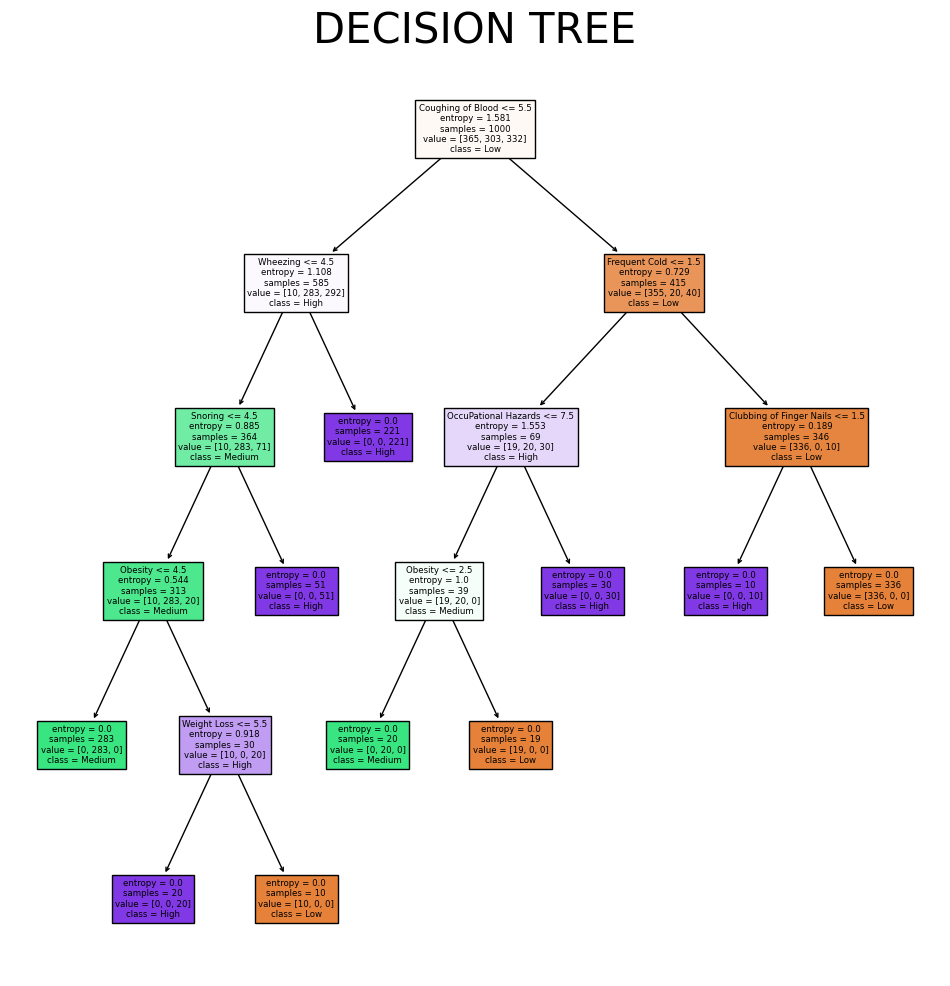

In [109]:
from sklearn import tree
import matplotlib.pyplot as plt


# Create a decision tree classifier
dt_model = tree.DecisionTreeClassifier(criterion='entropy')

# Train the classifier on the iris dataset
dt_model = dt_model.fit(features, targetClass)

# Plot the decision tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(dt_model, filled=True, feature_names=f_labels, class_names=c_labels)
ax.set_title("DECISION TREE", fontsize=30, ha='center', va='center')
plt.show()

In [108]:
score = dt_model .score(X_train, y_train)
dt_predict_y =dt_model.predict(X_test)

print("Score: ",score)

Score:  1.0


In [106]:
confusion_matrix(y_test,dt_predict_y)

array([[109,   0,   0],
       [  0,  87,   0],
       [  0,   0, 104]])

In [85]:
#Calculating the performance scores
dt_tp1, dt_tp2, dt_tp3 = 109, 87, 104
dt_fp1, dt_fp2, dt_fp3 = 0, 0, 0
dt_tn1, dt_tn2, dt_tn3 = 191, 213, 196
dt_fn1, dt_fn2, dt_fn3 = 0, 0, 0

dt_tp = dt_tp1 + dt_tp2 + dt_tp3
dt_fp = dt_fp1 + dt_fp2 + dt_fp3
dt_tn = dt_tn1 + dt_tn2 + dt_tn3
dt_fn = dt_fn1 + dt_fn2 + dt_fn3


dt_accuracy = (dt_tp + dt_tn) / (dt_tp + dt_tn + dt_fp + dt_fn)

dt_precision_class1 = dt_tp1 / (dt_tp1 + dt_fp1)
dt_precision_class2 = dt_tp2 / (dt_tp2 + dt_fp2)
dt_precision_class3 = dt_tp3 / (dt_tp3 + dt_fp3)
dt_precision_average = (dt_precision_class1 + dt_precision_class2 + dt_precision_class3) / 3

dt_recall_class1 = dt_tp1 / (dt_tp1 + dt_fn1)
dt_recall_class2 = dt_tp2 / (dt_tp2 + dt_fn2)
dt_recall_class3 = dt_tp3 / (dt_tp3 + dt_fn3)
dt_recall_average = (dt_recall_class1 + dt_recall_class2 + dt_recall_class3) / 3

dt_specificity_class1 = dt_tn1 / ( dt_fp1 + dt_tn1 )
dt_specificity_class2 = dt_tn2 / ( dt_fp2 + dt_tn2 )
dt_specificity_class3 = dt_tn3 / ( dt_fp3 + dt_tn3 )
dt_specificity_average = (dt_specificity_class1 + dt_specificity_class2 + dt_specificity_class3) / 3

dt_sensitivity_class1 = dt_tp1 / (dt_tp1 + dt_fn1)
dt_sensitivity_class2 = dt_tp2 / (dt_tp2 + dt_fn2)
dt_sensitivity_class3 = dt_tp3 / (dt_tp3 + dt_fn3)
dt_sensitivity_average = (dt_sensitivity_class1 + dt_sensitivity_class2 + dt_sensitivity_class3) / 3

dt_f1 = 2 * (dt_precision_average * dt_recall_average) / (dt_precision_average + dt_recall_average)


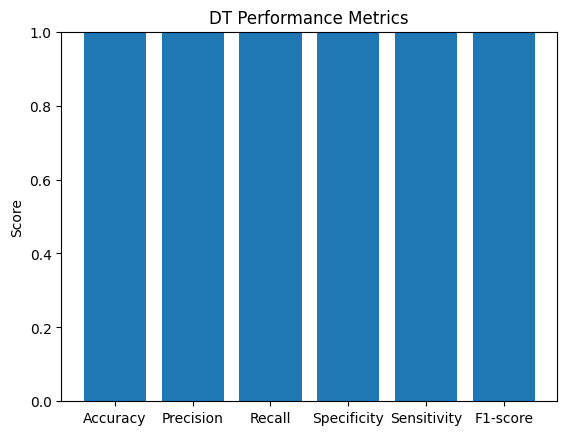

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
Specificity: 100.0%
Sensitivity: 100.0%
F1-score: 100.0%


In [86]:
#Plot the performance scores
dt_f1 = 2 * (dt_precision_average * dt_recall_average) / (dt_precision_average + dt_recall_average)
scores_label = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'Sensitivity', 'F1-score']
scores_values = [dt_accuracy,dt_precision_average, dt_recall_average, dt_specificity_average,dt_sensitivity_average, dt_f1]

plt.bar(scores_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Score')
plt.title('DT Performance Metrics')

# Show the plot
plt.show()
i=0
for x in scores_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

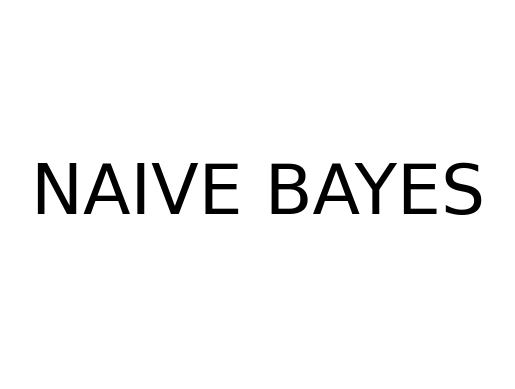

Score:  0.8957142857142857


In [73]:
from sklearn.naive_bayes import GaussianNB
plt.figure()
plt.text(0.5, 0.5, "NAIVE BAYES", fontsize=50, ha='center', va='center')
plt.axis('off')
plt.show()

nb =  GaussianNB()
#Train the model using the Training Data
nb.fit(X_train,y_train.values.ravel())
nb_score = nb.score(X_train, y_train)
nb_predict_y =nb.predict(X_test)

print("Score: ",nb_score)



In [74]:
confusion_matrix(y_test,nb_predict_y)

array([[103,   0,   6],
       [  4,  74,   9],
       [ 18,   0,  86]])

In [78]:
#Calculating the performance scores
nb_tp1, nb_tp2, nb_tp3 = 103, 74, 86
nb_fp1, nb_fp2, nb_fp3 = 22, 0, 15
nb_tn1, nb_tn2, nb_tn3 = 160, 189, 177
nb_fn1, nb_fn2, nb_fn3 = 6, 13, 18

nb_tp = nb_tp1 + nb_tp2 + nb_tp3
nb_fp = nb_fp1 + nb_fp2 + nb_fp3
nb_tn = nb_tn1 + nb_tn2 + nb_tn3
nb_fn = nb_fn1 + nb_fn2 + nb_fn3


nb_accuracy = (nb_tp + nb_tn) / (nb_tp + nb_tn + nb_fp + nb_fn)

nb_precision_class1 = nb_tp1 / (nb_tp1 + nb_fp1)
nb_precision_class2 = nb_tp2 / (nb_tp2 + nb_fp2)
nb_precision_class3 = nb_tp3 / (nb_tp3 + nb_fp3)
nb_precision_average = (nb_precision_class1 + nb_precision_class2 + nb_precision_class3) / 3

nb_recall_class1 = nb_tp1 / (nb_tp1 + nb_fn1)
nb_recall_class2 = nb_tp2 / (nb_tp2 + nb_fn2)
nb_recall_class3 = nb_tp3 / (nb_tp3 + nb_fn3)
nb_recall_average = (nb_recall_class1 + nb_recall_class2 + nb_recall_class3) / 3

nb_specificity_class1 = nb_tn1 / ( nb_fp1 + nb_tn1 )
nb_specificity_class2 = nb_tn2 / ( nb_fp2 + nb_tn2 )
nb_specificity_class3 = nb_tn3 / ( nb_fp3 + nb_tn3 )
nb_specificity_average = (nb_specificity_class1 + nb_specificity_class2 + nb_specificity_class3) / 3

nb_sensitivity_class1 = nb_tp1 / (nb_tp1 + nb_fn1)
nb_sensitivity_class2 = nb_tp2 / (nb_tp2 + nb_fn2)
nb_sensitivity_class3 = nb_tp3 / (nb_tp3 + nb_fn3)
nb_sensitivity_average = (nb_sensitivity_class1 + nb_sensitivity_class2 + nb_sensitivity_class3) / 3

nb_f1 = 2 * (nb_precision_average * nb_recall_average) / (nb_precision_average + nb_recall_average)

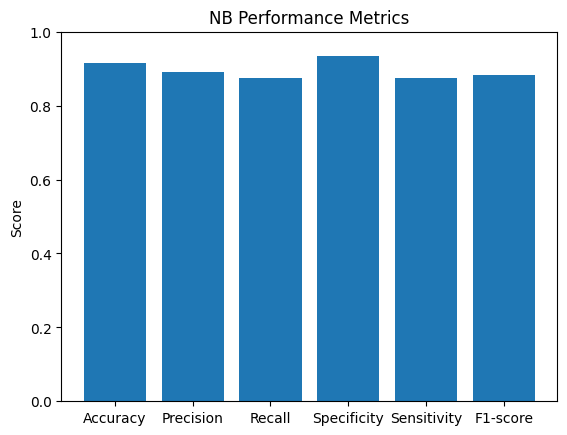

Accuracy: 91.42526071842411%
Precision: 89.18283828382837%
Recall: 87.41506393357072%
Specificity: 93.3665293040293%
Sensitivity: 87.41506393357072%
F1-score: 88.29010325118203%


In [79]:
#Plot the performance scores
scores_label = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'Sensitivity', 'F1-score']
scores_values = [nb_accuracy,nb_precision_average, nb_recall_average, nb_specificity_average,nb_sensitivity_average, nb_f1]

plt.bar(scores_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Score')
plt.title('NB Performance Metrics')

# Show the plot
plt.show()
i=0
for x in scores_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

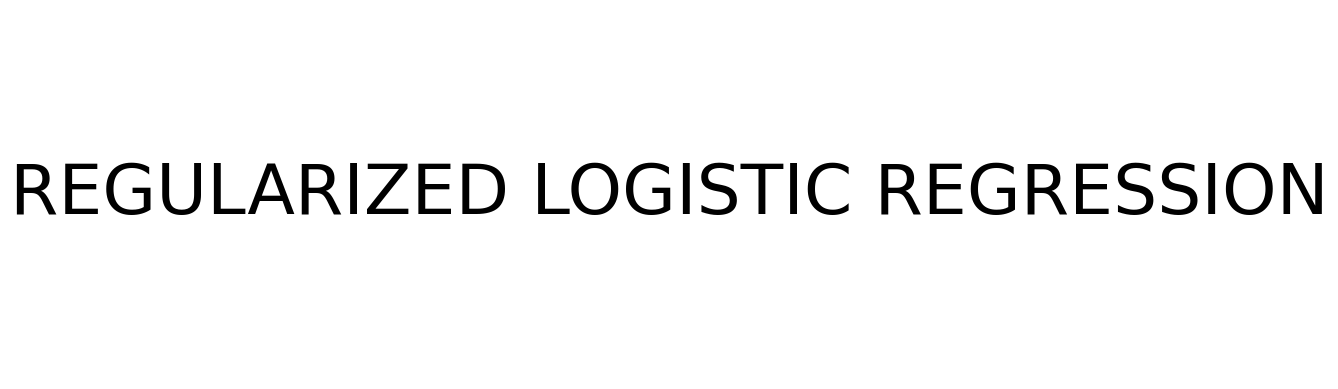

Score:  0.8114285714285714


In [83]:
from sklearn.linear_model import LogisticRegression

plt.figure()
plt.text(0.5, 0.5, "REGULARIZED LOGISTIC REGRESSION", fontsize=50, ha='center', va='center')
plt.axis('off')
plt.show()


#Create a Regularized Logistic Regression Model
rlr_model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

#Train the model using the Training Data
rlr_model.fit(X_train, y_train)

#Predict
rlr_score = rlr_model.score(X_train, y_train)
rlr_predict_y =rlr_model.predict(X_test)

print("Score: ",rlr_score)

In [84]:
confusion_matrix(y_test,rlr_predict_y)

array([[106,   0,   3],
       [  9,  57,  21],
       [ 15,   8,  81]])

In [87]:
#Calculating the performance scores
rlr_tp1, rlr_tp2, rlr_tp3 = 106, 57, 81
rlr_fp1, rlr_fp2, rlr_fp3 = 24, 8, 24
rlr_tn1, rlr_tn2, rlr_tn3 = 138, 187, 163
rlr_fn1, rlr_fn2, rlr_fn3 = 3, 30, 23

rlr_tp = rlr_tp1 + rlr_tp2 + rlr_tp3
rlr_fp = rlr_fp1 + rlr_fp2 + rlr_fp3
rlr_tn = rlr_tn1 + rlr_tn2 + rlr_tn3
rlr_fn = rlr_fn1 + rlr_fn2 + rlr_fn3


rlr_accuracy = (rlr_tp + rlr_tn) / (rlr_tp + rlr_tn + rlr_fp + rlr_fn)

rlr_precision_class1 = rlr_tp1 / (rlr_tp1 + rlr_fp1)
rlr_precision_class2 = rlr_tp2 / (rlr_tp2 + rlr_fp2)
rlr_precision_class3 = rlr_tp3 / (rlr_tp3 + rlr_fp3)
rlr_precision_average = (rlr_precision_class1 + rlr_precision_class2 + rlr_precision_class3) / 3

rlr_recall_class1 = rlr_tp1 / (rlr_tp1 + rlr_fn1)
rlr_recall_class2 = rlr_tp2 / (rlr_tp2 + rlr_fn2)
rlr_recall_class3 = rlr_tp3 / (rlr_tp3 + rlr_fn3)
rlr_recall_average = (rlr_recall_class1 + rlr_recall_class2 + rlr_recall_class3) / 3

rlr_specificity_class1 = rlr_tn1 / ( rlr_fp1 + rlr_tn1 )
rlr_specificity_class2 = rlr_tn2 / ( rlr_fp2 + rlr_tn2 )
rlr_specificity_class3 = rlr_tn3 / ( rlr_fp3 + rlr_tn3 )
rlr_specificity_average = (rlr_specificity_class1 + rlr_specificity_class2 + rlr_specificity_class3) / 3

rlr_sensitivity_class1 = rlr_tp1 / (rlr_tp1 + rlr_fn1)
rlr_sensitivity_class2 = rlr_tp2 / (rlr_tp2 + rlr_fn2)
rlr_sensitivity_class3 = rlr_tp3 / (rlr_tp3 + rlr_fn3)
rlr_sensitivity_average = (rlr_sensitivity_class1 + rlr_sensitivity_class2 + rlr_sensitivity_class3) / 3

rlr_f1 = 2 * (rlr_precision_average * rlr_recall_average) / (rlr_precision_average + rlr_recall_average)

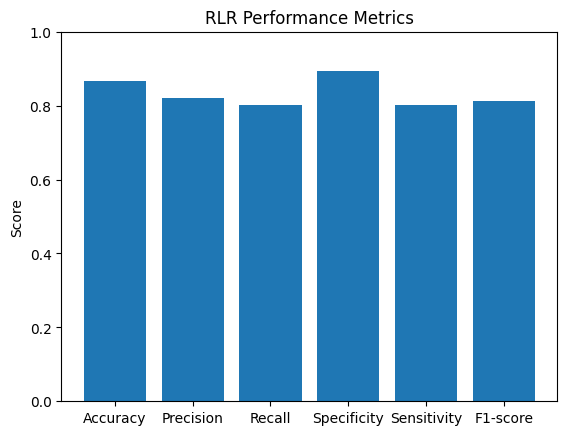

Accuracy: 86.7298578199052%
Precision: 82.12454212454213%
Recall: 80.21652106198135%
Specificity: 89.4161321612302%
Sensitivity: 80.21652106198135%
F1-score: 81.15931895148239%


In [89]:
#Plot the performance scores

scores_label = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'Sensitivity', 'F1-score']
scores_values = [rlr_accuracy,rlr_precision_average,rlr_recall_average, rlr_specificity_average,rlr_sensitivity_average, rlr_f1]

plt.bar(scores_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Score')
plt.title('RLR Performance Metrics')

# Show the plot
plt.show()
i=0
for x in scores_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

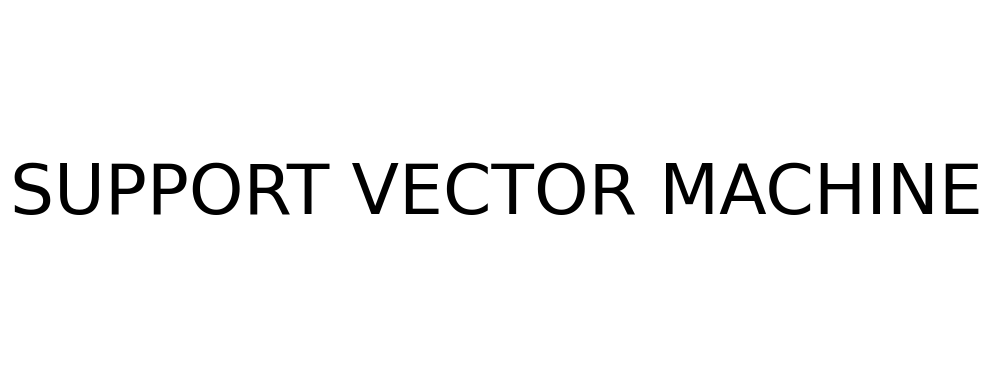

Score:  1.0


In [90]:
from sklearn.svm import SVC
plt.figure()
plt.text(0.5, 0.5, "SUPPORT VECTOR MACHINE", fontsize=50, ha='center', va='center')
plt.axis('off')
plt.show()

#Create a model for Support Vector Machine
svm_model = SVC(kernel ='linear')

#Train the model using the Training Data
svm_model.fit(X_train,y_train.values.ravel())

#Predict
svm_score = svm_model.score(X_train, y_train)
svm_predict_y =svm_model.predict(X_test)

print("Score: ",svm_score)

In [91]:
#Create the confusion matrix
confusion_matrix(y_test,svm_predict_y)

array([[109,   0,   0],
       [  0,  87,   0],
       [  0,   0, 104]])

In [92]:
#Calculating the performance scores
svm_tp1, svm_tp2, svm_tp3 = 109, 87, 104
svm_fp1, svm_fp2, svm_fp3 = 0, 0, 0
svm_tn1, svm_tn2, svm_tn3 = 191, 213, 196
svm_fn1, svm_fn2, svm_fn3 = 0, 0, 0

svm_tp = svm_tp1 + svm_tp2 + svm_tp3
svm_fp = svm_fp1 + svm_fp2 + svm_fp3
svm_tn = svm_tn1 + svm_tn2 + svm_tn3
svm_fn = svm_fn1 + svm_fn2 + svm_fn3


svm_accuracy = (svm_tp + svm_tn) / (svm_tp + svm_tn + svm_fp + svm_fn)

svm_precision_class1 = svm_tp1 / (svm_tp1 + svm_fp1)
svm_precision_class2 = svm_tp2 / (svm_tp2 + svm_fp2)
svm_precision_class3 = svm_tp3 / (svm_tp3 + svm_fp3)
svm_precision_average = (svm_precision_class1 + svm_precision_class2 + svm_precision_class3) / 3

svm_recall_class1 = svm_tp1 / (svm_tp1 + svm_fn1)
svm_recall_class2 = svm_tp2 / (svm_tp2 + svm_fn2)
svm_recall_class3 = svm_tp3 / (svm_tp3 + svm_fn3)
svm_recall_average = (svm_recall_class1 + svm_recall_class2 + svm_recall_class3) / 3

svm_specificity_class1 = svm_tn1 / ( svm_fp1 + svm_tn1 )
svm_specificity_class2 = svm_tn2 / ( svm_fp2 + svm_tn2 )
svm_specificity_class3 = svm_tn3 / ( svm_fp3 + svm_tn3 )
svm_specificity_average = (svm_specificity_class1 + svm_specificity_class2 + svm_specificity_class3) / 3

svm_sensitivity_class1 = svm_tp1 / (svm_tp1 + svm_fn1)
svm_sensitivity_class2 = svm_tp2 / (svm_tp2 + svm_fn2)
svm_sensitivity_class3 = svm_tp3 / (svm_tp3 + svm_fn3)
svm_sensitivity_average = (svm_sensitivity_class1 + svm_sensitivity_class2 + svm_sensitivity_class3) / 3

svm_f1 = 2 * (svm_precision_average * svm_recall_average) / (svm_precision_average + svm_recall_average)


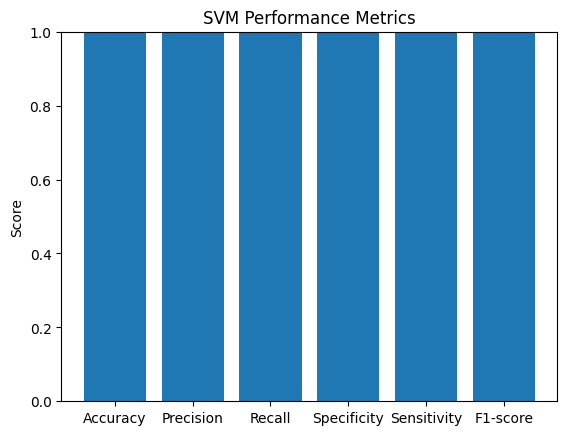

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
Specificity: 100.0%
Sensitivity: 100.0%
F1-score: 100.0%


In [99]:
#Plot the performance scores

scores_label = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'Sensitivity', 'F1-score']
scores_values = [svm_accuracy,svm_precision_average, svm_recall_average, svm_specificity_average,svm_sensitivity_average, svm_f1]

plt.bar(scores_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Score')
plt.title('SVM Performance Metrics')

# Show the plot
plt.show()
i=0
for x in scores_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

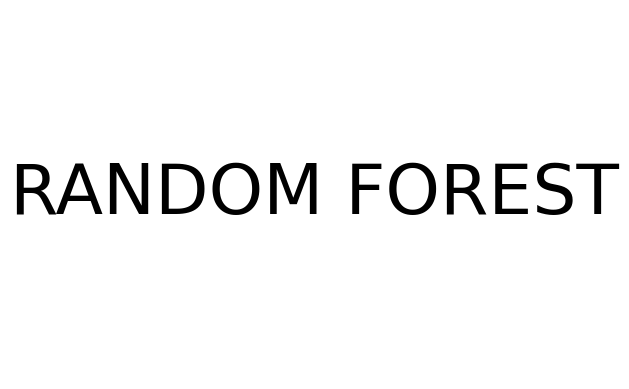

Score:  1.0


In [94]:
from sklearn.ensemble import RandomForestClassifier
plt.figure()
plt.text(0.5, 0.5, "RANDOM FOREST", fontsize=50, ha='center', va='center')
plt.axis('off')
plt.show()

#Create a model for Random Forest
rf_model = RandomForestClassifier()

#Train the model using the Training Data
rf_model.fit(X_train,y_train.values.ravel())

#Predict
rf_score = rf_model.score(X_train, y_train)
rf_predict_y =rf_model.predict(X_test)

print("Score: ",rf_score)

In [95]:
#Create the confusion matrix
confusion_matrix(y_test,rf_predict_y)

array([[109,   0,   0],
       [  0,  87,   0],
       [  0,   0, 104]])

In [97]:
#Calculating the performance scores
rf_tp1, rf_tp2, rf_tp3 = 109, 87, 104
rf_fp1, rf_fp2, rf_fp3 = 0, 0, 0
rf_tn1, rf_tn2, rf_tn3 = 191, 213, 196
rf_fn1, rf_fn2, rf_fn3 = 0, 0, 0

rf_tp = rf_tp1 + rf_tp2 + rf_tp3
rf_fp = rf_fp1 + rf_fp2 + rf_fp3
rf_tn = rf_tn1 + rf_tn2 + rf_tn3
rf_fn = rf_fn1 + rf_fn2 + rf_fn3


rf_accuracy = (rf_tp + rf_tn) / (rf_tp + rf_tn + rf_fp + rf_fn)

rf_precision_class1 = rf_tp1 / (rf_tp1 + rf_fp1)
rf_precision_class2 = rf_tp2 / (rf_tp2 + rf_fp2)
rf_precision_class3 = rf_tp3 / (rf_tp3 + rf_fp3)
rf_precision_average = (rf_precision_class1 + rf_precision_class2 + rf_precision_class3) / 3

rf_recall_class1 = rf_tp1 / (rf_tp1 + rf_fn1)
rf_recall_class2 = rf_tp2 / (rf_tp2 + rf_fn2)
rf_recall_class3 = rf_tp3 / (rf_tp3 + rf_fn3)
rf_recall_average = (rf_recall_class1 + rf_recall_class2 + rf_recall_class3) / 3

rf_specificity_class1 = rf_tn1 / ( rf_fp1 + rf_tn1 )
rf_specificity_class2 = rf_tn2 / ( rf_fp2 + rf_tn2 )
rf_specificity_class3 = rf_tn3 / ( rf_fp3 + rf_tn3 )
rf_specificity_average = (rf_specificity_class1 + rf_specificity_class2 + rf_specificity_class3) / 3

rf_sensitivity_class1 = rf_tp1 / (rf_tp1 + rf_fn1)
rf_sensitivity_class2 = rf_tp2 / (rf_tp2 + rf_fn2)
rf_sensitivity_class3 = rf_tp3 / (rf_tp3 + rf_fn3)
rf_sensitivity_average = (rf_sensitivity_class1 + rf_sensitivity_class2 + rf_sensitivity_class3) / 3

rf_f1 = 2 * (rf_precision_average * rf_recall_average) / (rf_precision_average + rf_recall_average)

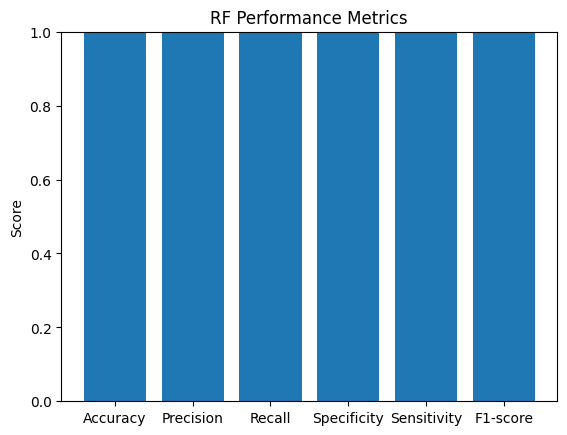

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
Specificity: 100.0%
Sensitivity: 100.0%
F1-score: 100.0%


In [98]:
#Plot the performance scores
scores_label = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'Sensitivity', 'F1-score']
scores_values = [rf_accuracy,rf_precision_average, rf_recall_average, rf_specificity_average,rf_sensitivity_average, rf_f1]

plt.bar(scores_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Score')
plt.title('RF Performance Metrics')

# Show the plot
plt.show()
i=0
for x in scores_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1